<a href="https://colab.research.google.com/github/GabriellaFurlan/Aluguel/blob/main/Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install bs4 pandas requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
from urllib.request import urlopen, Request
from urllib.error import HTTPError, URLError
import re
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
  headers = {
      'User-Agent'      : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36',
      'Accept'          : 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
      'Accept-Language' : 'en-US,en;q=0.5',
      'DNT'             : '1',
      'Connection'      : 'close'
  }

html_content = ''

for i in range(pages):
    url = 'https://www.vivareal.com.br/aluguel/sp/limeira/?pagina={}&onde=Brasil,S%C3%A3o%20Paulo,Limeira,,,,,,BR%3ESao%20Paulo%3ENULL%3ELimeira,,,'.format(i)
    data = requests.get(url, headers=headers)
    html_content += data.text

# Processar o conteúdo HTML completo fora do loop for
soup = BeautifulSoup(html_content, 'html.parser')



  soup

  Lista_Endereco = soup.find_all('span',{'class':'property-card__address'})

  Lista_preco = soup.find_all('div',{'class':'property-card__price js-property-card-prices js-property-card__price-small'})

  Lista_link = soup.find_all('a',{'class':'property-card__labels-container js-main-info js-listing-labels-link'})

  valor = Lista_preco[0].contents[1]
  preco = valor.text

  Lista_casas = []

  for local, preco, link in zip(Lista_Endereco,Lista_preco,Lista_link) :
    endereco = local.text.replace(", Limeira - SP","")
    aluguel = preco.contents[1].text.replace("/Mês","").replace("R$","").replace(".","").replace(" Preço abaixo do mercado","")
    visualizar = link['href']

    Lista_casas.append((endereco,aluguel,visualizar))

    df_casas = pd.DataFrame(Lista_casas, columns=['Bairro',"valor","Link"])

    df_casas['valor'] = df_casas['valor'].astype(np.float32)

  df_casas

,Bairro,valor,Link
0,Jardim Novo Horizonte,2500.0,/imovel/casa-3-quartos-jardim-novo-horizonte-b...
1,Conjunto Residencial Victor D andrea,1500.0,/imovel/casa-3-quartos-conjunto-residencial-vi...
2,Jardim Nova Itália,2100.0,/imovel/casa-2-quartos-jardim-nova-italia-bair...
3,Vila Castelar,2100.0,/imovel/casa-2-quartos-vila-castelar-bairros-l...
4,Centro,600.0,/imovel/sala-comercial-centro-bairros-limeira-...
...,...,...,...
355,Jardim Residencial Antonio Brigatto,1700.0,/imovel/casa-2-quartos-jardim-residencial-anto...
356,Vila Santa Lúcia,1500.0,/imovel/casa-2-quartos-vila-santa-lucia-bairro...
357,Jardim Nova Europa,1550.0,/imovel/casa-2-quartos-jardim-nova-europa-bair...
358,Jardim Residencial Antonio Simonetti,1700.0,/imovel/casa-3-quartos-jardim-residencial-anto...


In [ ]:
colunas_numericas = df_casas.select_dtypes(include='number')


bairros = colunas_numericas.groupby(df_casas['Bairro']).mean().round(2)
print(bairros)

                                                           valor
Bairro                                                          
Boa Vista                                            1400.000000
Centro                                                820.409973
Conjunto Residencial Victor D andrea                 1500.000000
Itaipu                                               1300.000000
Jardim Campo Belo                                    1500.000000
Jardim Cavinato                                      1400.000000
Jardim Marajoara                                     2000.000000
Jardim Nereide                                       2500.000000
Jardim Nova Europa                                    991.179993
Jardim Nova Itália                                   2100.000000
Jardim Novo Horizonte                                2500.000000
Jardim Ouro Verde                                    1400.000000
Jardim Piratininga                                   1500.000000
Jardim Residencial Antoni

<Axes: >

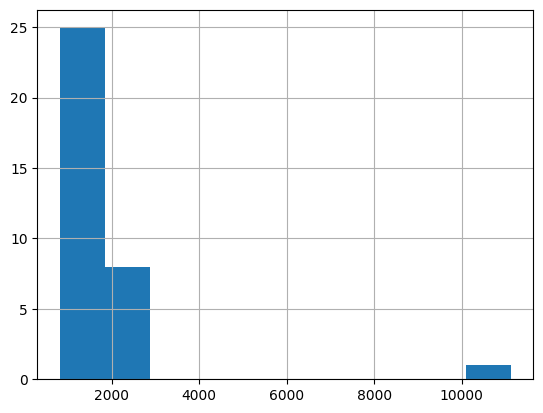

In [ ]:
bairros.valor.hist()
